Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [31]:
student = pd.read_csv("data/stud.csv")
df = student.copy()
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Checks

1.Missing Values
2.Duplicates
3.Data Type
4.Check stastics of dataset
5.Check the number of unique values of each column
6.Check various categories present in the different categorical column

Check Missing Values

In [32]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values found

Check for duplicates

In [34]:
df.duplicated().sum()

0

No duplicates

Check data type

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check statistics

In [36]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Check number of unique values of each column

In [37]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Insight

All means are close to each other. 
All standard deviations are close to each other
Minimum score of math is 0

Segregating Numerical features and categorical features from dataset

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

Using current columns for total score and average

In [38]:
df["Total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average"] = df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Histogram and KDE

<Axes: xlabel='Average', ylabel='Count'>

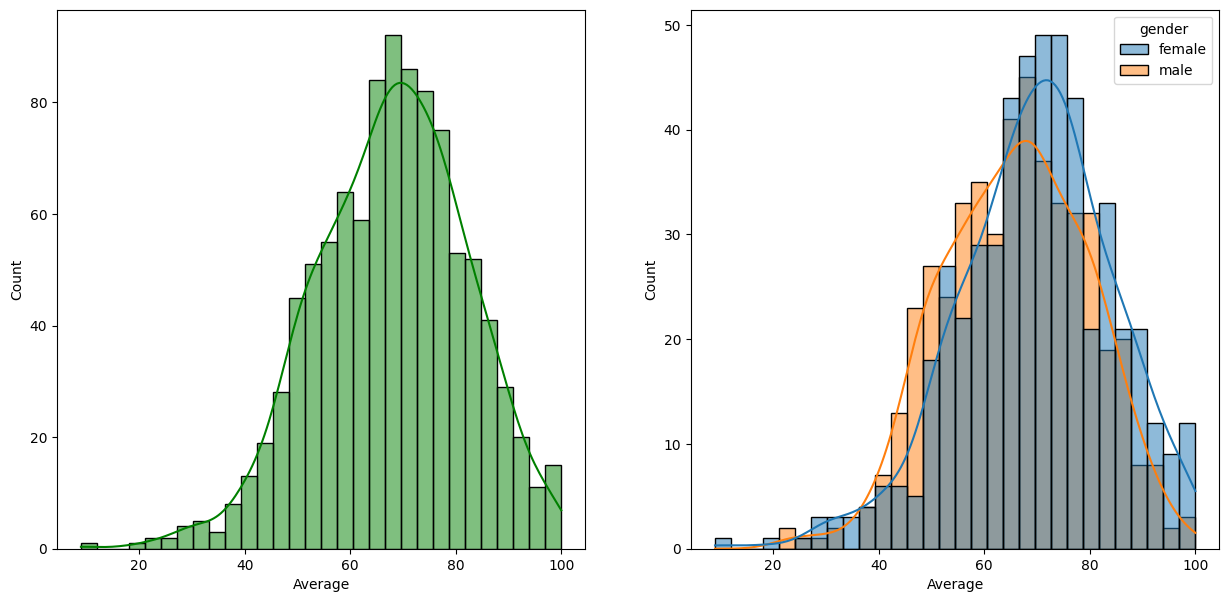

In [57]:
fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = "Average",kde = True,bins = 30,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x = "Average",kde = True,bins = 30,hue = "gender")

Insight

Female students perform better that male students

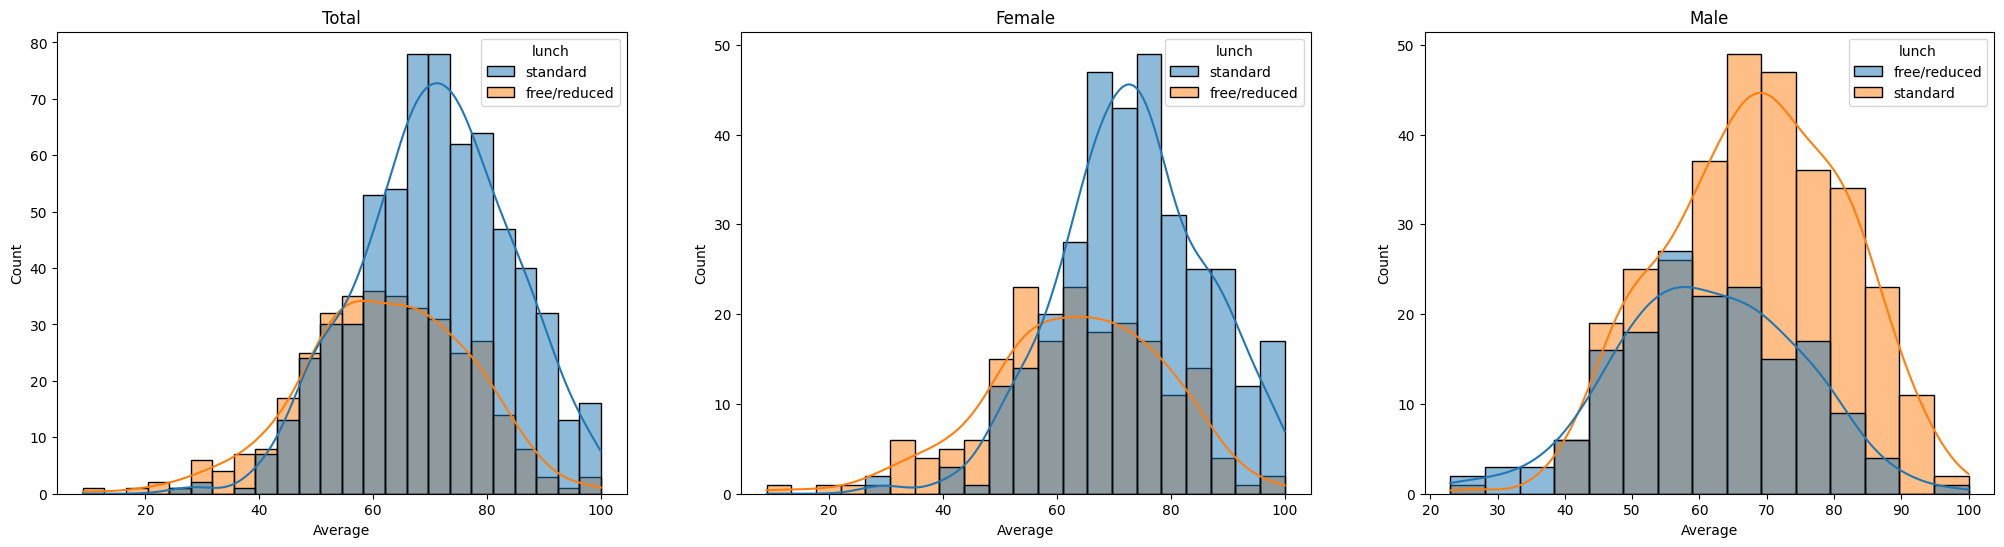

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.title("Total")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.title("Female")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.title("Male")
plt.show()

Insights

Standard meal help students perform well(male/female)

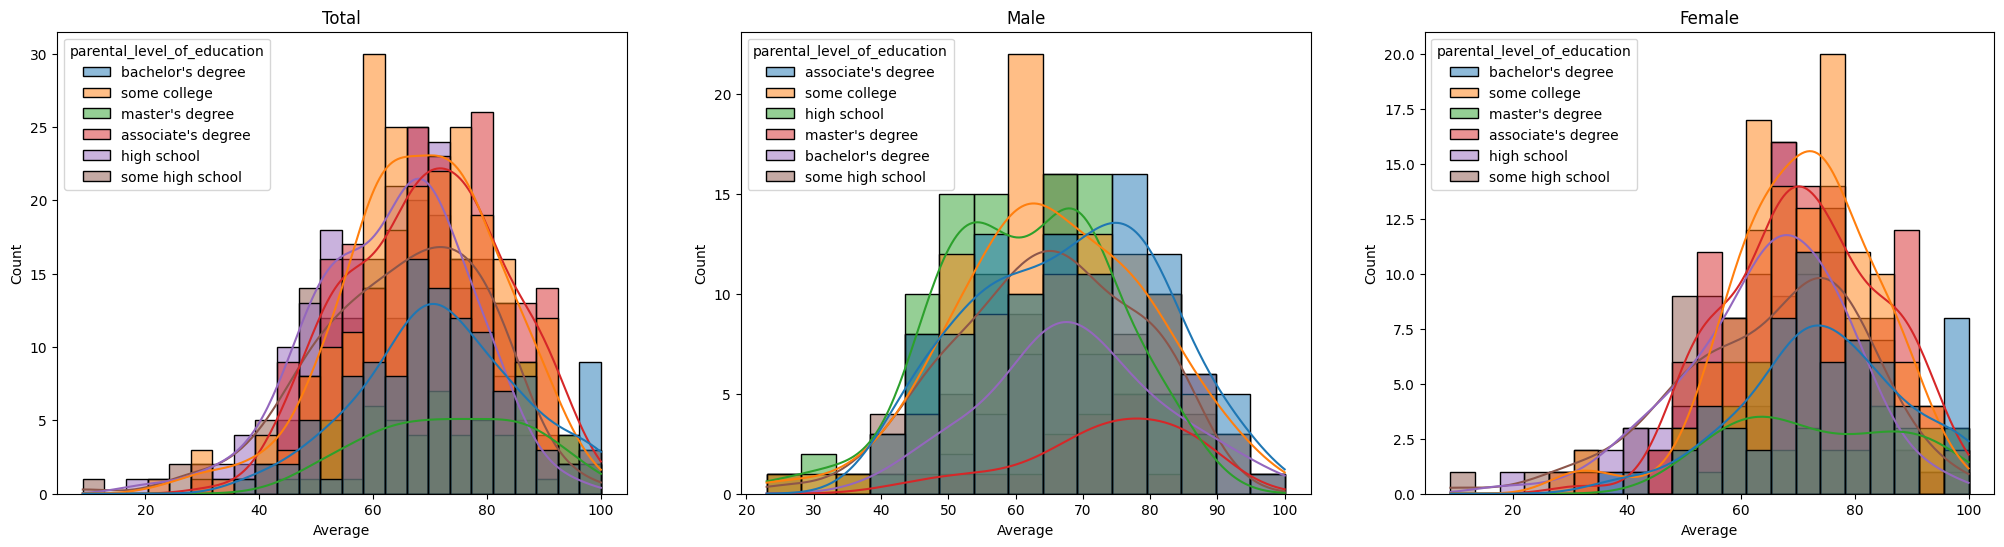

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.title("Total")
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.title("Male")
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.title("Female")
plt.show()
